In [35]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#!pip install plotly
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import ListedColormap
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from wordcloud import WordCloud


In [3]:
data= pd.read_csv('TrustPilot_Cleaned_Doc_Term.csv')
df= data.drop(columns=['UID'])
df.head()

,able,absolutely,accept,accepted,account,actually,add,address,advance,ago,...,working,worse,worst,worth,would,wrong,year,yesterday,yet,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.263133,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.108582,0.0,0.0,0.0,0.0,0.0


In [16]:
df.shape

(6015, 500)

# Data Quality Check

In [4]:
# Null Check
df.isna().any().any()

False

In [5]:
# Data Types
df.dtypes

able          float64
absolutely    float64
accept        float64
accepted      float64
account       float64
               ...   
wrong         float64
year          float64
yesterday     float64
yet           float64
zero          float64
Length: 500, dtype: object

# K- Means Clustering

Goal: Cluster the data based on similarity of words

In [7]:
cluster_ip_data= df.copy()
cluster_ip_data.sample(3)

,able,absolutely,accept,accepted,account,actually,add,address,advance,ago,...,working,worse,worst,worth,would,wrong,year,yesterday,yet,zero
5444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
cluster_ip_data.describe()

,able,absolutely,accept,accepted,account,actually,add,address,advance,ago,...,working,worse,worst,worth,would,wrong,year,yesterday,yet,zero
count,6015.000000,6015.000000,6015.000000,6015.000000,6015.000000,6015.000000,6015.000000,6015.000000,6015.000000,6015.000000,...,6015.000000,6015.000000,6015.000000,6015.000000,6015.000000,6015.000000,6015.000000,6015.000000,6015.000000,6015.000000
mean,0.005935,0.003062,0.002316,0.002051,0.008941,0.002633,0.002076,0.005282,0.003723,0.002266,...,0.002914,0.001801,0.005673,0.001929,0.016153,0.005115,0.005685,0.002145,0.002432,0.002275
std,0.041786,0.027211,0.026103,0.024367,0.049064,0.025335,0.027660,0.042198,0.032580,0.024287,...,0.029867,0.023601,0.040808,0.023955,0.057010,0.036323,0.035682,0.026173,0.026507,0.024928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.635193,0.440605,0.761869,0.642444,0.685834,0.539979,0.650571,0.770429,0.716501,0.600856,...,0.672466,0.707588,0.678313,0.473955,0.704888,0.565858,0.514100,0.691770,0.544369,0.728163


### Decide Ideal Number of Clusters

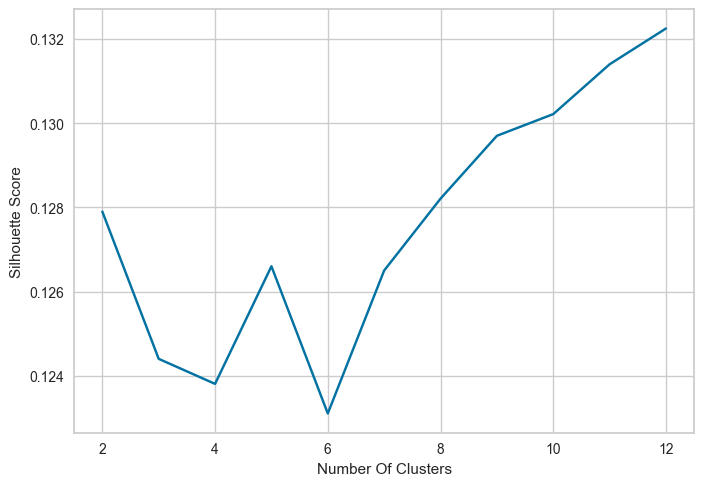

In [9]:
silhouette= []
for i in range(2,13):
  cluster= KMeans(n_clusters=i, random_state=150).fit_predict(cluster_ip_data)
  silhouette.append(metrics.silhouette_score(cluster_ip_data, labels= cluster, metric= "euclidean"))

plt.plot(range(2,13),silhouette)
plt.xlabel("Number Of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

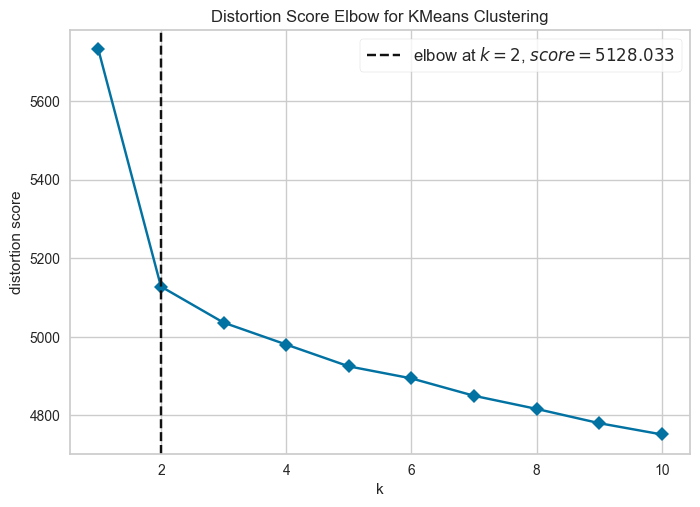

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# Elbow Method

model = KMeans(random_state=150)
visualizer = KElbowVisualizer(model, k=(1,11), timings=False) # k is range of number of clusters.
visualizer.fit(cluster_ip_data) # Fit data to visualizer
visualizer.show()

2 clusters would be ideal according to the both Silli Silhouette and Elbow curve

## Clustering

Testing differnt clusters and comparing the results manually

,Count,count
0,1,5364
1,0,651


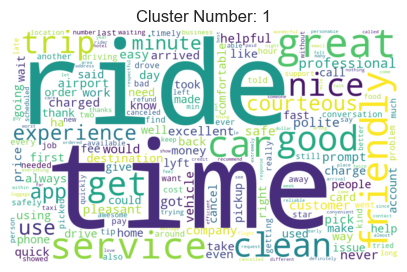

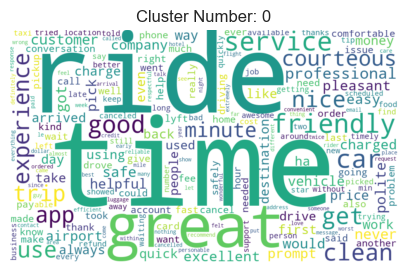

In [39]:
# Define the KMeans model with K=2
model= KMeans(n_clusters=2, random_state=150) 

KMeans_data= cluster_ip_data.copy()
# Fit the data and extract clusters
y_kmeans= model.fit_predict(KMeans_data) 
KMeans_data['cluster_number']= y_kmeans
KMeans_data['cluster_number']= y_kmeans
display(KMeans_data.cluster_number.value_counts().reset_index().rename(columns={'index':'Cluster Number', 'cluster_number':'Count'}))


for cluster_num in KMeans_data['cluster_number'].unique():
    cluster= KMeans_data[KMeans_data['cluster_number']==1].drop(columns=['cluster_number'])

    # Generate word cloud from frequency (takes a dictionary of word frequencies as input.)
    FinalDF=pd.DataFrame(cluster1.values,columns=cluster1.columns)
    tempdf =FinalDF.sum(axis=0,numeric_only=True)
    wordcloud = WordCloud(width=1000, height=600, background_color="white",
                min_word_length=4, #mask=next_image,
                max_words=200).generate_from_frequencies(tempdf)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Cluster Number: "+str(cluster_num))
    plt.show()

,Count,count
0,2,3337
1,1,2027
2,0,651


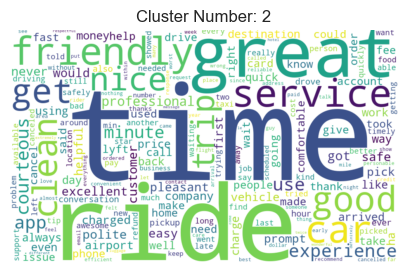

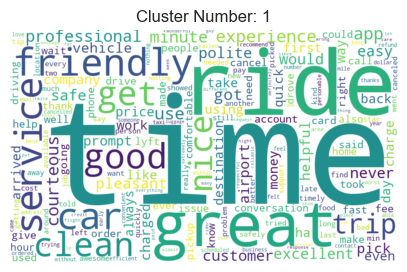

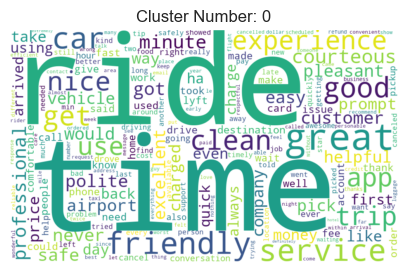

In [40]:
# Define the KMeans model with K=3
model= KMeans(n_clusters=3, random_state=150) 

KMeans_data= cluster_ip_data.copy()
# Fit the data and extract clusters
y_kmeans= model.fit_predict(KMeans_data) 
KMeans_data['cluster_number']= y_kmeans
KMeans_data['cluster_number']= y_kmeans
display(KMeans_data.cluster_number.value_counts().reset_index().rename(columns={'index':'Cluster Number', 'cluster_number':'Count'}))


for cluster_num in KMeans_data['cluster_number'].unique():
    cluster= KMeans_data[KMeans_data['cluster_number']==1].drop(columns=['cluster_number'])

    # Generate word cloud from frequency (takes a dictionary of word frequencies as input.)
    FinalDF=pd.DataFrame(cluster1.values,columns=cluster1.columns)
    tempdf =FinalDF.sum(axis=0,numeric_only=True)
    wordcloud = WordCloud(width=1000, height=600, background_color="white",
                min_word_length=4, #mask=next_image,
                max_words=200).generate_from_frequencies(tempdf)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Cluster Number: "+str(cluster_num))
    plt.show()

,Count,count
0,3,2938
1,2,1679
2,1,747
3,0,651


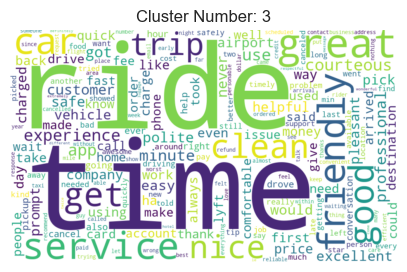

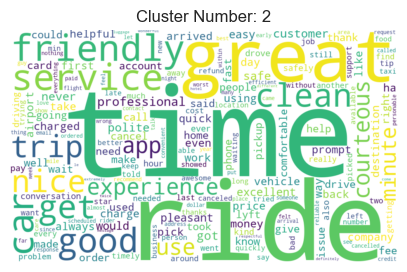

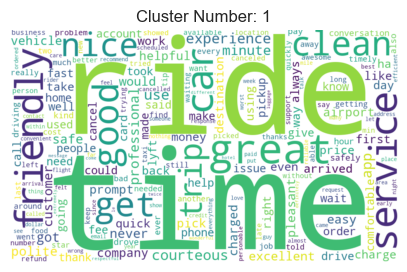

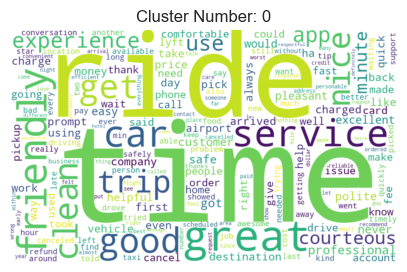

In [41]:
# Define the KMeans model with K=4
model= KMeans(n_clusters=4, random_state=150) 

KMeans_data= cluster_ip_data.copy()
# Fit the data and extract clusters
y_kmeans= model.fit_predict(KMeans_data) 
KMeans_data['cluster_number']= y_kmeans
KMeans_data['cluster_number']= y_kmeans
display(KMeans_data.cluster_number.value_counts().reset_index().rename(columns={'index':'Cluster Number', 'cluster_number':'Count'}))


for cluster_num in KMeans_data['cluster_number'].unique():
    cluster= KMeans_data[KMeans_data['cluster_number']==1].drop(columns=['cluster_number'])

    # Generate word cloud from frequency (takes a dictionary of word frequencies as input.)
    FinalDF=pd.DataFrame(cluster1.values,columns=cluster1.columns)
    tempdf =FinalDF.sum(axis=0,numeric_only=True)
    wordcloud = WordCloud(width=1000, height=600, background_color="white",
                min_word_length=4, #mask=next_image,
                max_words=200).generate_from_frequencies(tempdf)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Cluster Number: "+str(cluster_num))
    plt.show()

Almost all clusters have overlapping words due to high frequency of selected words. This is a clerly indicator that clustering words only based on similar words is insufficient. Hence, a topic modeling alogrithm has been explored in the next section.

## Inference

In [42]:
# Save the clustered data

## Save the data for further use (ARM)


In [50]:
df.to_csv('Clustered_Product_Info.csv', index= False)